In [1]:
%pip install -r modules/requirements_ph.txt
from modules.ph import *

Ein Kondensator wird über einen Widerstand $R$ entladen und dabei die Spannung $U$ gemessen.

In [2]:
with schemdraw.Drawing() as d:
    d += elm.ResistorIEC().right().label(r'$R=100Ω$')
    d += elm.Capacitor().down().label(r'$C$')
    d += elm.Line().left()
    d += elm.MeterV().up().label(r'$U_0$')

In [3]:
df_data = pd.read_excel('data.xlsx')
df_data

,t1,I1,U1,t2,I2,U2
0,0.0000,0.0001,9.83,0.0000,0.0001,0.01
1,0.0005,0.0001,9.83,0.0005,0.0001,0.01
2,0.0010,0.0001,9.83,0.0010,0.0001,0.01
3,0.0015,0.0001,9.84,0.0015,0.0001,0.01
4,0.0020,0.0001,9.83,0.0020,0.0001,0.01
...,...,...,...,...,...,...
496,0.2480,0.0001,0.01,0.2480,0.0001,9.83
497,0.2485,0.0001,0.01,0.2485,0.0001,9.83
498,0.2490,0.0000,0.02,0.2490,0.0002,9.83
499,0.2495,0.0000,0.01,0.2495,0.0002,9.83


Die Spannung ändert sich nach dem folgenden Zusammenhang: $$U(t) = U_0 \cdot e^{-\frac{t}{R\cdot C}}$$

Die Messdaten werden mit dem Fit-Modell `a*np.exp(b*x)+c` angepasst. Dabei ist $a=U_0$, $b=-\frac{1}{R\cdot C }$ und $c$ der Offset in der Spannung bei der Messung.

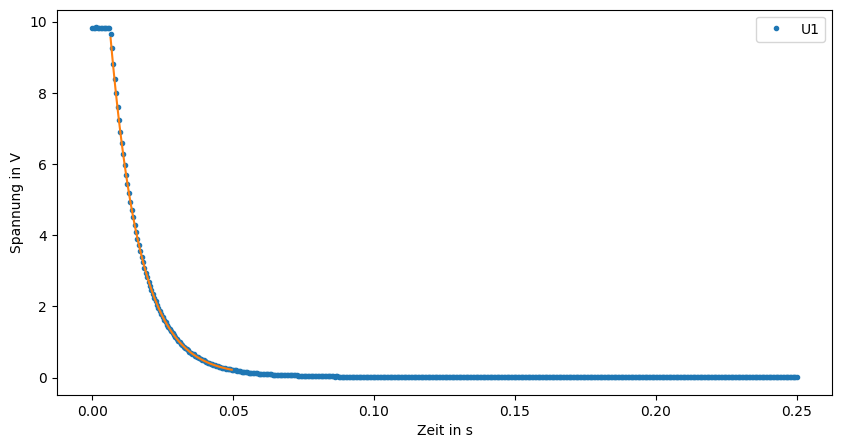

In [4]:
def model(p, x):
    a,b,c = p
    return a*np.exp(b*x)+c

fig,ax = plt.subplots(figsize=(10,5))
df_data.plot(ax=ax,x='t1',y='U1', xlabel='Zeit in s', ylabel='Spannung in V',style='.')

von, bis = 13, 100
X = df_data['t1'][von:bis]
Y = df_data['U1'][von:bis]
up , p, yfit, out = uODR(model,[16,-90,0],X,Y)
ax.plot(X,yfit)
#fig.savefig('plot.jpg',dpi=600)

Um die Kapazität des Kondensators $C$ zu bestimmen, wird $b=-\frac{1}{R\cdot C }$ umgeformt zu:
$$C=-\frac{1}{R\cdot b }$$

In [6]:
results = {
            'a' : up[0] *ureg('V'),
            'b' : up[1] *ureg('1/s'),
            'c' : up[2] *ureg('V'),
          }
results['R'] = ufloat(100,1)*ureg('ohm')
results['C'] = (-1/(results['b'] * results['R'])).to('uF')
for idx,el in results.items():
    print(f"{idx}={el}")

a=17.52+/-0.06 V
b=-94.41+/-0.17 1/s
c=0.0566+/-0.0013 V
R=100.0+/-1.0 Ω
C=105.9+/-1.1 µF
